In [2]:
import seaborn as sns
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [3]:
btc = yf.Ticker('BTC-USD')
prices1 = btc.history(period='5y')
prices1.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

eth = yf.Ticker('ETH-USD')
prices2 = eth.history(period='5y')
prices2.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

usdt = yf.Ticker('USDT-USD')
prices3 = usdt.history(period='5y')
prices3.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

bnb = yf.Ticker('BNB-USD')
prices4 = bnb.history(period='5y')
prices4.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

In [4]:
p1 = prices1.join(prices2, lsuffix = ' (BTC)', rsuffix = ' (ETH)')
p2 = prices3.join(prices4, lsuffix = ' (USDT)', rsuffix = ' (BNB)')
data = p1.join(p2, lsuffix = '_', rsuffix = '_')

In [5]:
data.head()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2020-10-22 00:00:00+00:00,12965.891602,34729759598,413.772980,15772846485,1.001091,51457694149,30.658192,530907796
2020-10-23 00:00:00+00:00,12931.539062,28974975003,409.766693,14256222052,1.000657,45364336403,30.633961,514504830
2020-10-24 00:00:00+00:00,13108.062500,24542317940,412.457611,12201739194,1.000909,38024192721,30.588821,407454460
2020-10-25 00:00:00+00:00,13031.173828,24406920575,406.217773,10890207469,1.000721,37992408340,30.107540,391997739
2020-10-26 00:00:00+00:00,13075.248047,29461458313,393.888306,15155684229,1.000958,53856600950,31.154560,624224136


In [6]:
data.tail()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2025-10-18 00:00:00+00:00,107198.265625,37779905278,3890.346191,23815676385,1.000311,92433050492,1093.152466,3767783165
2025-10-19 00:00:00+00:00,108666.710938,47657008953,3984.649658,32870655221,1.000401,113441520509,1109.680054,3690436753
2025-10-20 00:00:00+00:00,110588.929688,63507793085,3980.760254,40224612563,1.000375,140035880063,1101.061646,4209252745
2025-10-21 00:00:00+00:00,108476.890625,101194375480,3876.764160,49960290350,1.000462,189249929340,1057.440430,4398689427
2025-10-22 00:00:00+00:00,107966.765625,87887945728,3801.279785,46426796032,1.000203,169533620224,1068.159302,3687962112


In [7]:
data.shape

(1827, 8)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1827 entries, 2020-10-22 00:00:00+00:00 to 2025-10-22 00:00:00+00:00
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Close (BTC)    1827 non-null   float64
 1   Volume (BTC)   1827 non-null   int64  
 2   Close (ETH)    1827 non-null   float64
 3   Volume (ETH)   1827 non-null   int64  
 4   Close (USDT)   1827 non-null   float64
 5   Volume (USDT)  1827 non-null   int64  
 6   Close (BNB)    1827 non-null   float64
 7   Volume (BNB)   1827 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 128.5 KB


In [9]:
data.isna().sum()

Close (BTC)      0
Volume (BTC)     0
Close (ETH)      0
Volume (ETH)     0
Close (USDT)     0
Volume (USDT)    0
Close (BNB)      0
Volume (BNB)     0
dtype: int64

In [10]:
data.describe()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
count,1827.000000,1.827000e+03,1827.000000,1.827000e+03,1827.000000,1.827000e+03,1827.000000,1.827000e+03
mean,51477.488466,3.635862e+10,2430.825670,1.904802e+10,1.000171,6.905158e+10,422.439026,1.757639e+09
std,29048.039231,2.224608e+10,976.085523,1.263730e+10,0.000715,4.392428e+10,214.217278,1.477411e+09
min,12931.539062,5.331173e+09,382.819977,2.081626e+09,0.995872,9.989859e+09,26.857050,2.038465e+08
25%,27808.447266,2.142552e+10,1683.184692,1.025234e+10,0.999923,3.960588e+10,272.460754,7.602357e+08
50%,43208.539062,3.148318e+10,2330.210938,1.608847e+10,1.000157,5.862483e+10,371.954376,1.527960e+09
75%,65783.945312,4.570891e+10,3178.957031,2.377893e+10,1.000416,8.456744e+10,587.019775,2.126242e+09
max,124752.531250,3.509679e+11,4831.348633,9.773662e+10,1.011530,3.443980e+11,1310.214355,1.798295e+10


# EDA

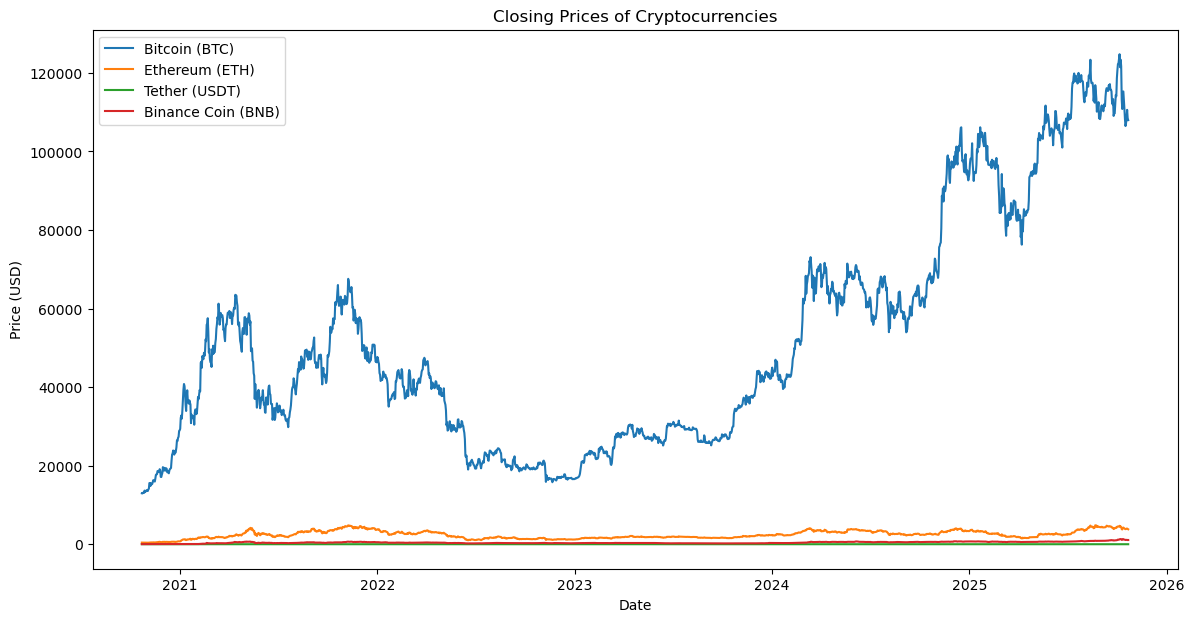

In [11]:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close (BTC)'], label='Bitcoin (BTC)')
plt.plot(data.index, data['Close (ETH)'], label='Ethereum (ETH)')
plt.plot(data.index, data['Close (USDT)'], label='Tether (USDT)')
plt.plot(data.index, data['Close (BNB)'], label='Binance Coin (BNB)')
plt.title('Closing Prices of Cryptocurrencies')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

<Axes: xlabel='Date'>

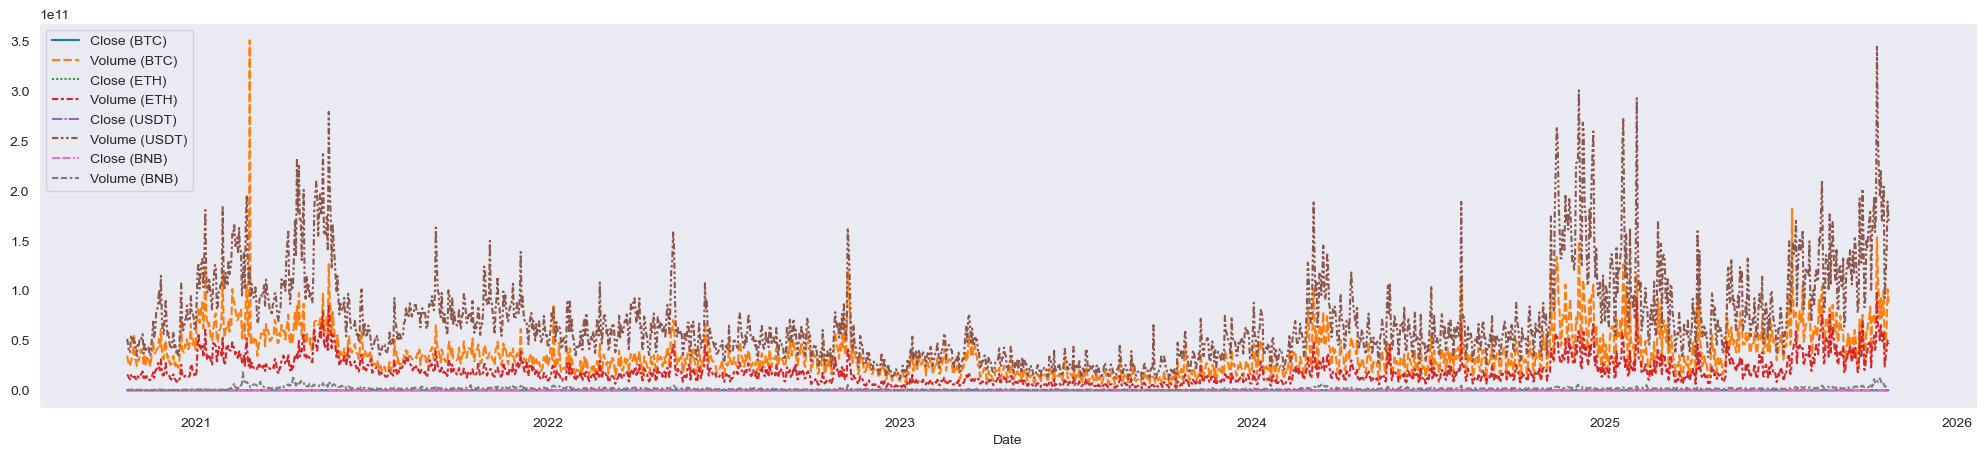

In [12]:
plt.figure(figsize = (25, 5))
sns.set_style('dark')
sns.lineplot(data=data)

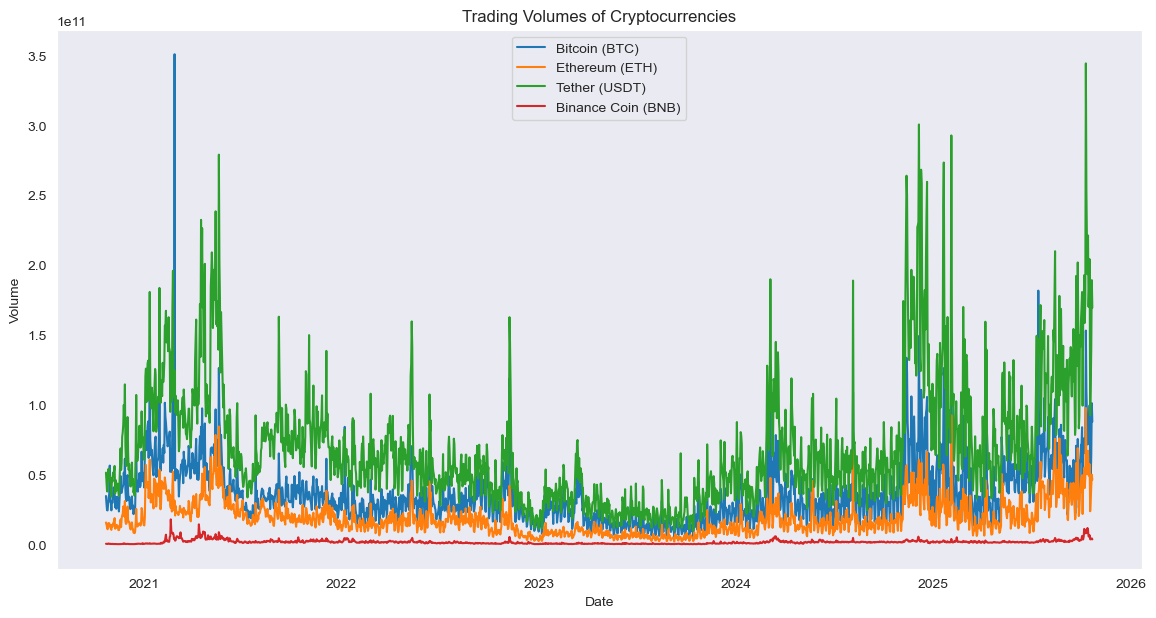

In [13]:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Volume (BTC)'], label='Bitcoin (BTC)')
plt.plot(data.index, data['Volume (ETH)'], label='Ethereum (ETH)')
plt.plot(data.index, data['Volume (USDT)'], label='Tether (USDT)')
plt.plot(data.index, data['Volume (BNB)'], label='Binance Coin (BNB)')
plt.title('Trading Volumes of Cryptocurrencies')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

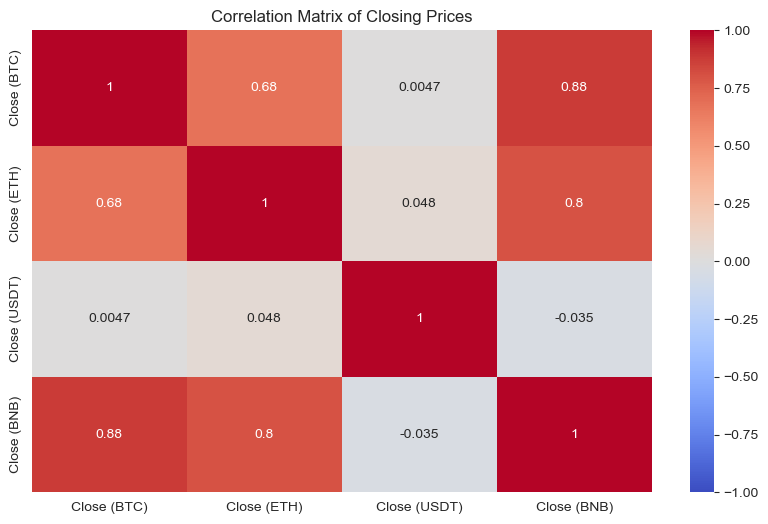

In [14]:
corr_matrix = data[['Close (BTC)', 'Close (ETH)', 'Close (USDT)', 'Close (BNB)']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Closing Prices')
plt.show()


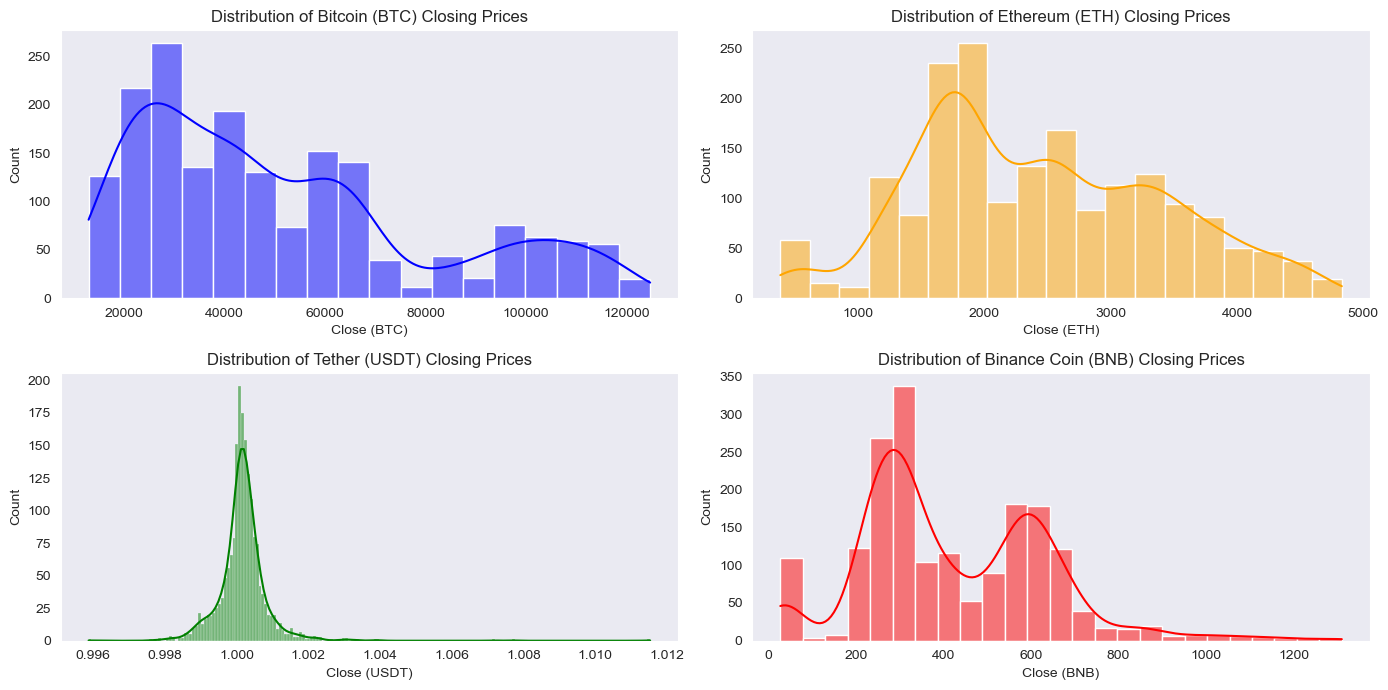

In [15]:
plt.figure(figsize=(14, 7))

plt.subplot(2, 2, 1)
sns.histplot(data['Close (BTC)'], kde=True, color='blue')
plt.title('Distribution of Bitcoin (BTC) Closing Prices')

plt.subplot(2, 2, 2)
sns.histplot(data['Close (ETH)'], kde=True, color='orange')
plt.title('Distribution of Ethereum (ETH) Closing Prices')

plt.subplot(2, 2, 3)
sns.histplot(data['Close (USDT)'], kde=True, color='green')
plt.title('Distribution of Tether (USDT) Closing Prices')

plt.subplot(2, 2, 4)
sns.histplot(data['Close (BNB)'], kde=True, color='red')
plt.title('Distribution of Binance Coin (BNB) Closing Prices')

plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'Close (BTC)'}>,
        <Axes: title={'center': 'Volume (BTC)'}>,
        <Axes: title={'center': 'Close (ETH)'}>,
        <Axes: title={'center': 'Volume (ETH)'}>],
       [<Axes: title={'center': 'Close (USDT)'}>,
        <Axes: title={'center': 'Volume (USDT)'}>,
        <Axes: title={'center': 'Close (BNB)'}>,
        <Axes: title={'center': 'Volume (BNB)'}>]], dtype=object)

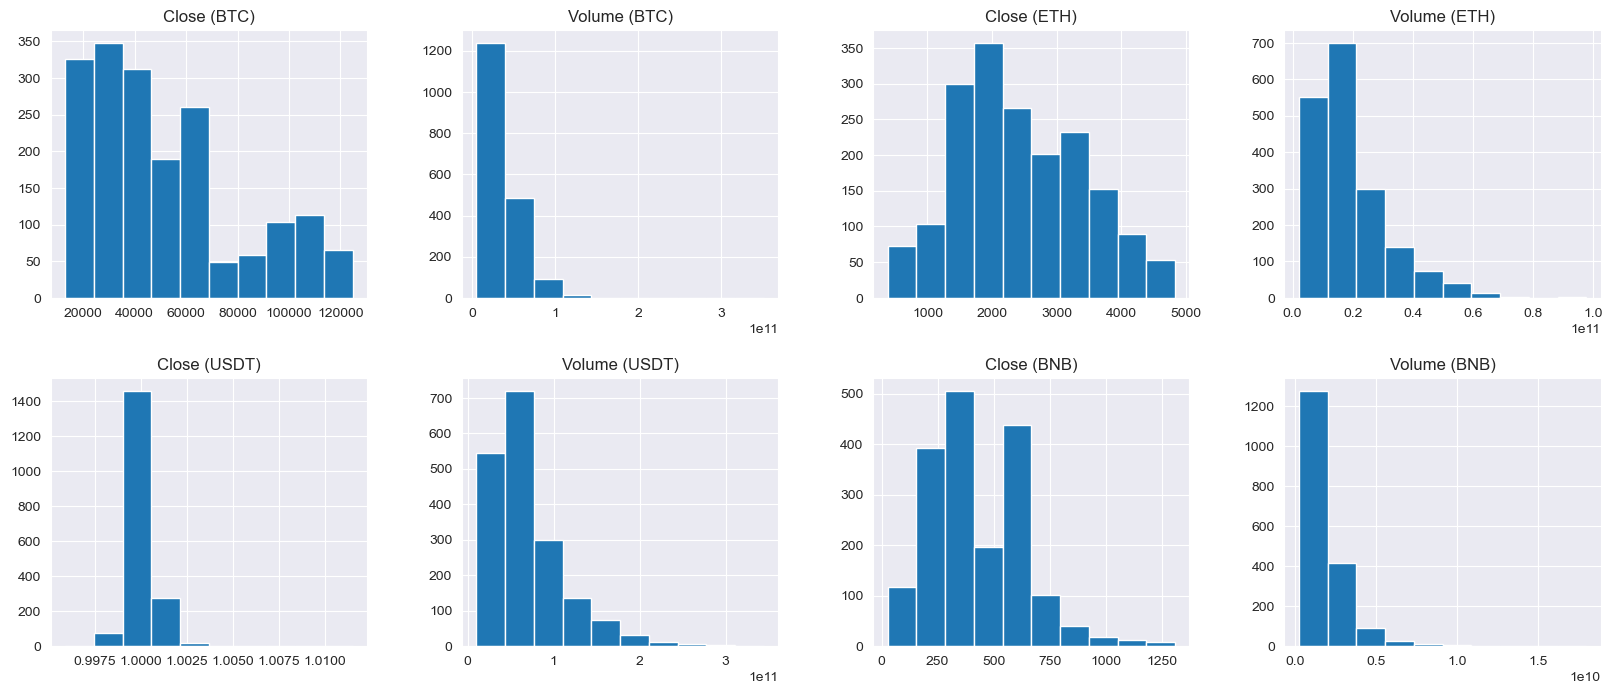

In [16]:
data.hist(figsize=(20, 8), layout=(2, 4))

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

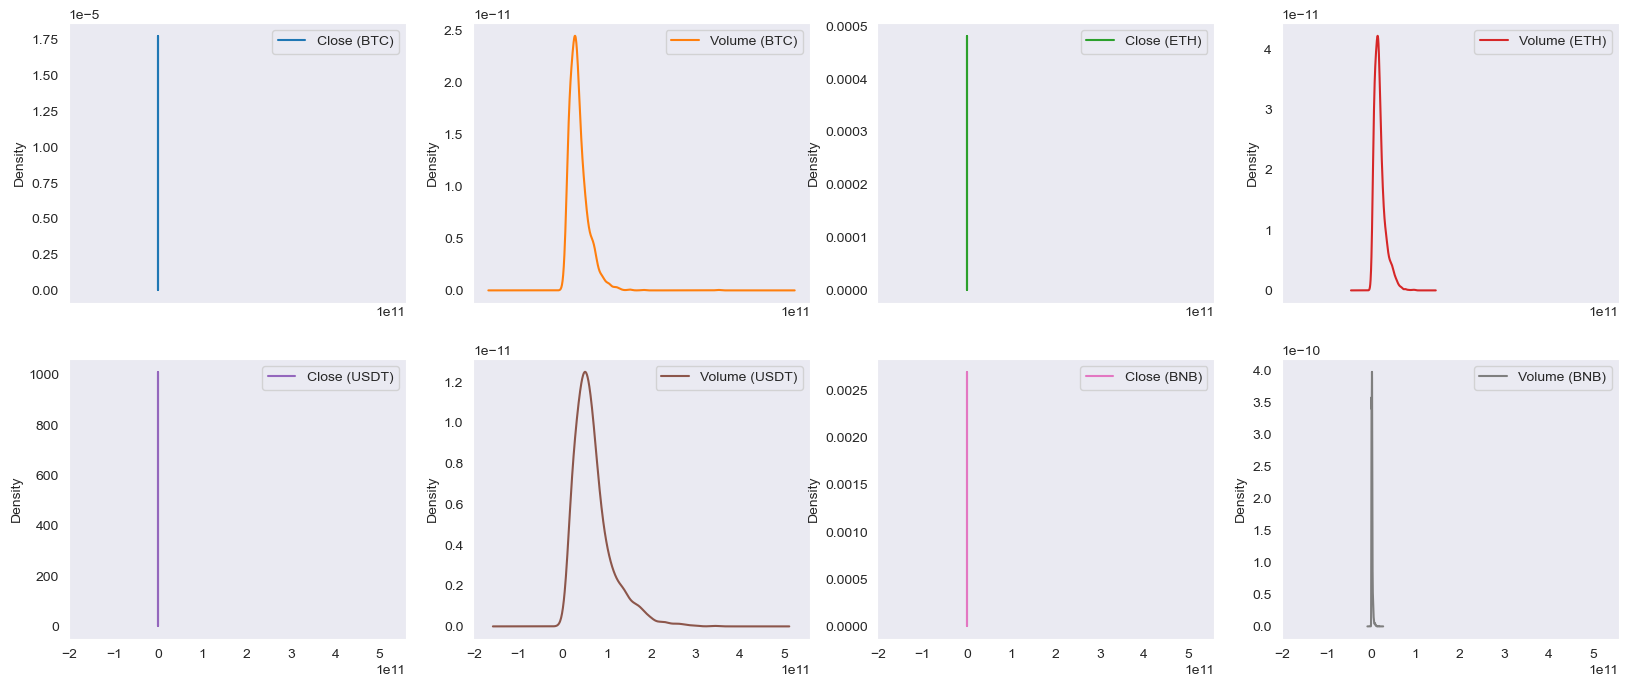

In [17]:
data.plot(kind = "kde", subplots = True, layout = (2, 4), figsize = (20, 8))

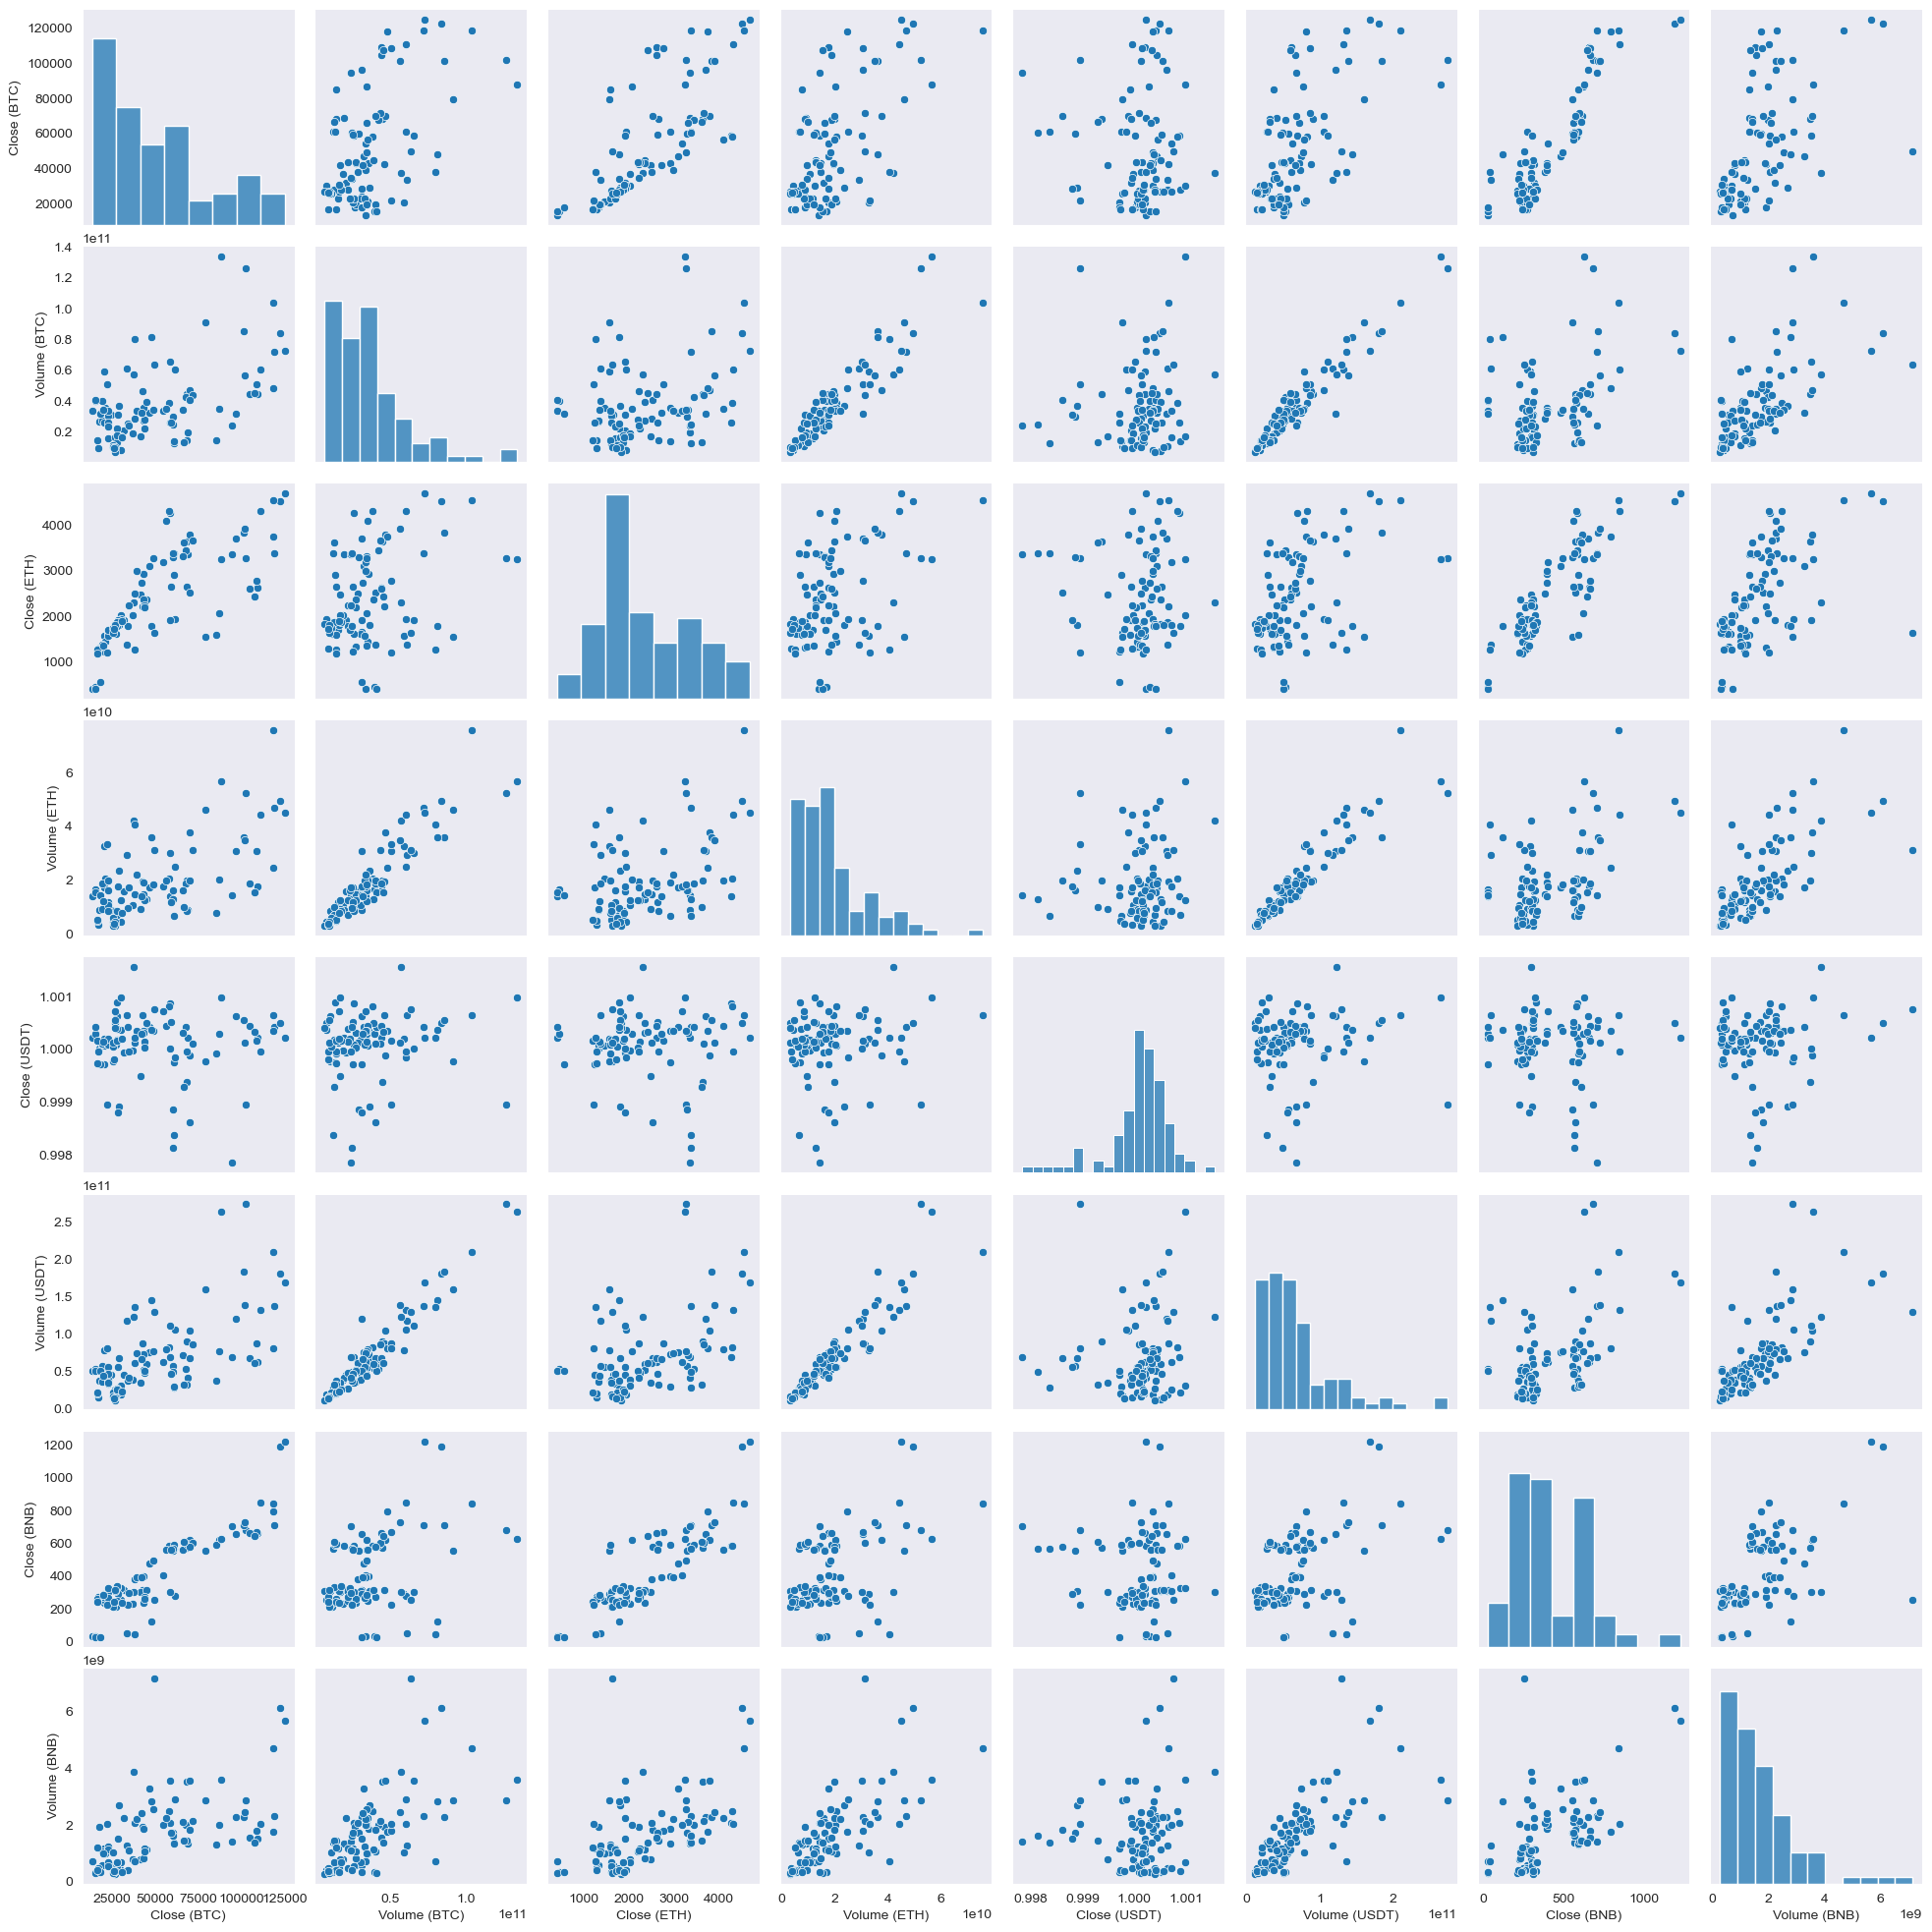

In [18]:
sns.pairplot(data.sample(n=100));

# Data Pre-processing

In [19]:
X = data.drop(columns = ['Close (BTC)'], axis = 1)
Y = data.loc[:, 'Close (BTC)']

In [20]:
X.head()

,Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,
2020-10-22 00:00:00+00:00,34729759598,413.772980,15772846485,1.001091,51457694149,30.658192,530907796
2020-10-23 00:00:00+00:00,28974975003,409.766693,14256222052,1.000657,45364336403,30.633961,514504830
2020-10-24 00:00:00+00:00,24542317940,412.457611,12201739194,1.000909,38024192721,30.588821,407454460
2020-10-25 00:00:00+00:00,24406920575,406.217773,10890207469,1.000721,37992408340,30.107540,391997739
2020-10-26 00:00:00+00:00,29461458313,393.888306,15155684229,1.000958,53856600950,31.154560,624224136


In [21]:
X.tail()

,Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,
2025-10-18 00:00:00+00:00,37779905278,3890.346191,23815676385,1.000311,92433050492,1093.152466,3767783165
2025-10-19 00:00:00+00:00,47657008953,3984.649658,32870655221,1.000401,113441520509,1109.680054,3690436753
2025-10-20 00:00:00+00:00,63507793085,3980.760254,40224612563,1.000375,140035880063,1101.061646,4209252745
2025-10-21 00:00:00+00:00,101194375480,3876.764160,49960290350,1.000462,189249929340,1057.440430,4398689427
2025-10-22 00:00:00+00:00,87887945728,3801.279785,46426796032,1.000203,169533620224,1068.159302,3687962112


In [22]:
Y.head()


Date
2020-10-22 00:00:00+00:00    12965.891602
2020-10-23 00:00:00+00:00    12931.539062
2020-10-24 00:00:00+00:00    13108.062500
2020-10-25 00:00:00+00:00    13031.173828
2020-10-26 00:00:00+00:00    13075.248047
Name: Close (BTC), dtype: float64

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [24]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {Y_train.shape}')
print(f'y_test shape: {Y_test.shape}')

X_train shape: (1461, 7)
X_test shape: (366, 7)
y_train shape: (1461,)
y_test shape: (366,)


In [25]:
from sklearn.feature_selection import SelectKBest

fs = SelectKBest(k=4)
X_train = fs.fit_transform(X_train, Y_train)
X_test = fs.transform(X_test)

C:\Users\Shivam Kumar yadav\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:108: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


In [26]:
mask = fs.get_support()
selected_features = X.columns[mask]
print("Selected Features:", selected_features) 

Selected Features: Index(['Close (USDT)', 'Volume (USDT)', 'Close (BNB)', 'Volume (BNB)'], dtype='object')


In [27]:
X_train


array([[1.00009298e+00, 4.01529204e+10, 2.80018616e+02, 1.51475452e+09],
       [1.00083995e+00, 5.41089534e+10, 3.93820221e+02, 2.10191766e+09],
       [9.98884022e-01, 4.43806364e+10, 2.19284470e+02, 1.06261000e+09],
       ...,
       [1.00032401e+00, 5.35776877e+10, 6.01164185e+02, 1.44481883e+09],
       [1.00003803e+00, 7.22225172e+10, 4.02502655e+02, 1.71449679e+09],
       [1.00004900e+00, 6.40153436e+10, 2.62668396e+02, 1.17365647e+09]])

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

----- Linear Regression -----
Mean Squared Error (MSE): 141107385.33942035
R-squared: 0.8384370404569177

----- Ridge Regression -----
Mean Squared Error (MSE): 144599098.80308524
R-squared: 0.8344391521840313

----- Lasso Regression -----
Mean Squared Error (MSE): 141179091.72484547
R-squared: 0.8383549391847586

----- ElasticNet Regression -----
Mean Squared Error (MSE): 786599895.2806792
R-squared: 0.09937097372945214

----- Support Vector Regression (SVR) -----
Mean Squared Error (MSE): 908789429.0914097
R-squared: -0.04053171570218406

----- Decision Tree Regression -----
Mean Squared Error (MSE): 89053360.47427547
R-squared: 0.8980370556730777

----- Random Forest Regression -----
Mean Squared Error (MSE): 47509870.68582712
R-squared: 0.9456028804087903

----- Gradient Boosting Regression -----
Mean Squared Error (MSE): 50968577.42180834
R-squared: 0.94164278367032

----- K-Nearest Neighbors Regression -----
Mean Squared Error (MSE): 56884354.86175904
R-squared: 0.934869427981688

C:\Users\Shivam Kumar yadav\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


----- Neural Network Regression (MLP) -----
Mean Squared Error (MSE): 552945738.7636223
R-squared: 0.36689670915169526

                             Model           MSE  R-squared
0                Linear Regression  1.411074e+08   0.838437
1                 Ridge Regression  1.445991e+08   0.834439
2                 Lasso Regression  1.411791e+08   0.838355
3            ElasticNet Regression  7.865999e+08   0.099371
4  Support Vector Regression (SVR)  9.087894e+08  -0.040532
5         Decision Tree Regression  8.905336e+07   0.898037
6         Random Forest Regression  4.750987e+07   0.945603
7     Gradient Boosting Regression  5.096858e+07   0.941643
8   K-Nearest Neighbors Regression  5.688435e+07   0.934869
9  Neural Network Regression (MLP)  5.529457e+08   0.366897


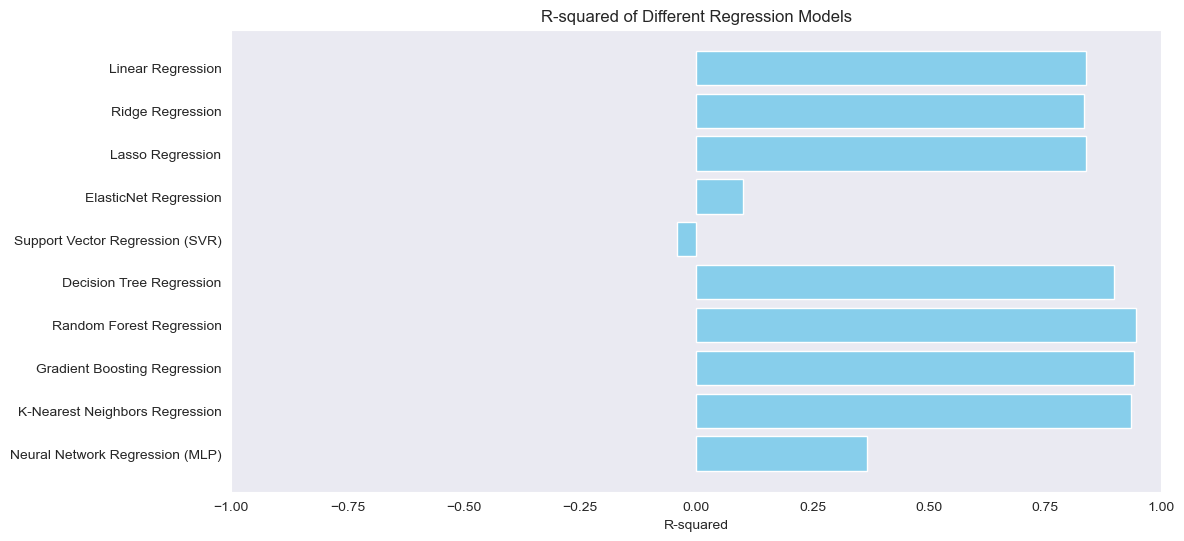

In [30]:

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'ElasticNet Regression': ElasticNet(alpha=1.0, l1_ratio=0.5),
    'Support Vector Regression (SVR)': SVR(kernel='rbf'),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100),
    'Gradient Boosting Regression': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1),
    'K-Nearest Neighbors Regression': KNeighborsRegressor(n_neighbors=5),
    'Neural Network Regression (MLP)': MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam')
}

results = {'Model': [], 'MSE': [], 'R-squared': []}

for name, model in models.items():
    model.fit(X_train, Y_train)

    Y_pred = model.predict(X_test)

    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)

    results['Model'].append(name)
    results['MSE'].append(mse)
    results['R-squared'].append(r2)

    print(f"----- {name} -----")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared: {r2}")
    print()

results_df = pd.DataFrame(results)
print(results_df)

plt.figure(figsize=(12, 6))
plt.barh(results_df['Model'], results_df['R-squared'], color='skyblue')
plt.xlabel('R-squared')
plt.title('R-squared of Different Regression Models')
plt.xlim(-1, 1)
plt.gca().invert_yaxis()
plt.show()


In [31]:
import pickle
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

X, Y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=0)


scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_rf = RandomForestRegressor(n_estimators=100, random_state=0)

model_rf.fit(X_train, Y_train)

filename = 'random_forest_model.pkl'
pickle.dump(model_rf, open(filename, 'wb'))

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

loaded_model = pickle.load(open(filename, 'rb'))

Y_pred = loaded_model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Loaded Random Forest Regression - Mean Squared Error (MSE): {mse}")
print(f"Loaded Random Forest Regression - R-squared: {r2}")


Loaded Random Forest Regression - Mean Squared Error (MSE): 47793331.442260474
Loaded Random Forest Regression - R-squared: 0.9452783278801361
